In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#To make it faster for data retrieval : load directly the complete dataset
tweets = pd.read_excel("/Users/GuillaumeKunsch/Desktop/TFM_Guillaume_Kunsch/Tweepy/tweets.xlsx")                  
tweets

,text,lang,country,date,user_name,user_id,nb_of_tweets,user_creation_date,verified,filter_level,favorite,retweet,url
0,JUST IN: US Treasury Office propose new rule t...,en,None,Sat Nov 21 17:30:27 +0000 2020,LiviN,1201027291,25459,Wed Feb 20 13:23:38 +0000 2013,0,low,0,0,0
1,The Bullish Case for #Bitcoin\n@real_vijay \n👉...,en,None,Sat Nov 21 17:30:28 +0000 2020,StormJib.HODL,15893397,3313,Mon Aug 18 16:31:04 +0000 2008,0,low,0,0,1
2,"BITCOIN MOONING STEP BY STEP UPWARD TO $26,000...",en,None,Sat Nov 21 17:30:28 +0000 2020,George Fish,109361772,39,Thu Jan 28 20:23:57 +0000 2010,0,low,0,0,1
3,RT @Thunderblunder7: pokemon showdown was made...,en,None,Sat Nov 21 17:30:28 +0000 2020,Brandon 🐝🌳🇬🇭🖤 #JoyconBoy,1027954637331202049,67326,Fri Aug 10 16:27:38 +0000 2018,0,low,0,0,0
4,"I recently discussed inflation/deflation, stim...",en,None,Sat Nov 21 17:30:28 +0000 2020,Altperspective,837994867028459521,364,Sat Mar 04 11:55:20 +0000 2017,0,low,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707713,RT @MMCrypto: #BITCOIN JUST BROKE THE 2019 HIG...,en,None,Sat Oct 31 11:49:43 +0000 2020,cryptoboss💥,4160950469,5946,Wed Nov 11 03:00:06 +0000 2015,0,low,0,0,0
707714,Sana all whale 👀,en,None,Sat Oct 31 11:49:43 +0000 2020,Jazz G🍀,996004058640007169,10411,Mon May 14 12:27:27 +0000 2018,0,low,0,0,0
707715,"RT @BarrySilbert: Hi @stoolpresidente, please ...",en,None,Sat Oct 31 11:49:43 +0000 2020,Светик Алимова,926774522161782785,78,Sat Nov 04 11:33:59 +0000 2017,0,low,0,0,0
707716,RT @100trillionUSD: Best present on #Bitcoin w...,en,None,Sat Oct 31 11:49:43 +0000 2020,Loedere.eth 🇧🇪 - ₿,420490529,7707,Thu Nov 24 18:03:50 +0000 2011,0,low,0,0,0


In [3]:
#Some data on country and user name is missing
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707718 entries, 0 to 707717
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   text                707718 non-null  object
 1   lang                707718 non-null  object
 2   country             707716 non-null  object
 3   date                707718 non-null  object
 4   user_name           707685 non-null  object
 5   user_id             707718 non-null  int64 
 6   nb_of_tweets        707718 non-null  int64 
 7   user_creation_date  707718 non-null  object
 8   verified            707718 non-null  int64 
 9   filter_level        707718 non-null  object
 10  favorite            707718 non-null  int64 
 11  retweet             707718 non-null  int64 
 12  url                 707718 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 70.2+ MB


# Languages analysis

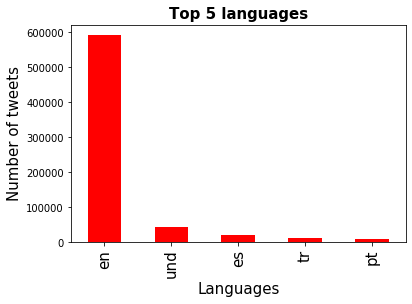

In [4]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

# Location analysis (biased because most tweets doesn't have their location)

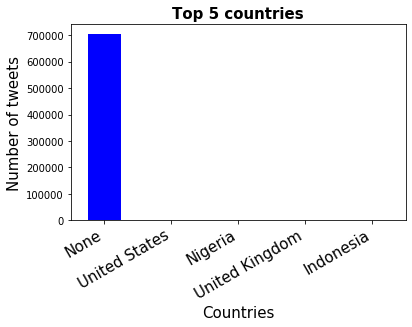

In [5]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
fig.autofmt_xdate()

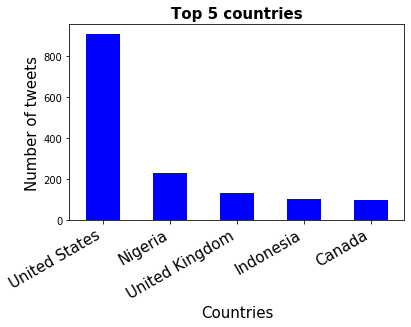

In [6]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[1:6].plot(ax=ax, kind='bar', color='blue')
fig.autofmt_xdate()

# Analysis of tweets' date

In [7]:
hours = []
for date in tweets["date"]: #to keep only the hour
    hours.append(date[10:19])
tweets["hour"] = hours

dates = []
for date in tweets["date"]: #to keep only the date
    dates.append(date[:10])
tweets["new_date"] = dates

year = []
for date in tweets["date"]: #to keep only the year
    year.append(date[26:])
tweets["year"] = year


import datetime

date_format = []

equivalent_m = {"Jan" : 1, "Feb" : 2, "Mar" : 3, "Apr" : 4, "May" : 5, "Jun": 6, "Jul" : 7, "Aug" : 8, "Sep" : 9, "Oct": 10, "Nov": 11, "Dec": 12}

for index, row in tweets.iterrows() :
    day = int(row["new_date"][8:])
    month = int(equivalent_m[row["new_date"][4:7]])
    year = int(row["year"])
    date_format.append(datetime.date(year,month,day))
    
tweets["date_format"] = date_format

day_of_the_week=[]
equivalent_w = {"Mon" : 1, "Tue" : 2, "Wed" : 3, "Thu" : 4, "Fri" : 5, "Sat": 6, "Sun" : 7}

for date in tweets["new_date"]: 
    day = int(equivalent_w[date[:3]])
    day_of_the_week.append(day)
    
tweets["day"] = day_of_the_week #to store which day of the week the tweet was posted


In [8]:
tweets = tweets.drop(columns = ["new_date", "year"])
tweets.head()

,text,lang,country,date,user_name,user_id,nb_of_tweets,user_creation_date,verified,filter_level,favorite,retweet,url,hour,date_format,day
0,JUST IN: US Treasury Office propose new rule t...,en,None,Sat Nov 21 17:30:27 +0000 2020,LiviN,1201027291,25459,Wed Feb 20 13:23:38 +0000 2013,0,low,0,0,0,17:30:27,2020-11-21,6
1,The Bullish Case for #Bitcoin\n@real_vijay \n👉...,en,None,Sat Nov 21 17:30:28 +0000 2020,StormJib.HODL,15893397,3313,Mon Aug 18 16:31:04 +0000 2008,0,low,0,0,1,17:30:28,2020-11-21,6
2,"BITCOIN MOONING STEP BY STEP UPWARD TO $26,000...",en,None,Sat Nov 21 17:30:28 +0000 2020,George Fish,109361772,39,Thu Jan 28 20:23:57 +0000 2010,0,low,0,0,1,17:30:28,2020-11-21,6
3,RT @Thunderblunder7: pokemon showdown was made...,en,None,Sat Nov 21 17:30:28 +0000 2020,Brandon 🐝🌳🇬🇭🖤 #JoyconBoy,1027954637331202049,67326,Fri Aug 10 16:27:38 +0000 2018,0,low,0,0,0,17:30:28,2020-11-21,6
4,"I recently discussed inflation/deflation, stim...",en,None,Sat Nov 21 17:30:28 +0000 2020,Altperspective,837994867028459521,364,Sat Mar 04 11:55:20 +0000 2017,0,low,0,0,0,17:30:28,2020-11-21,6


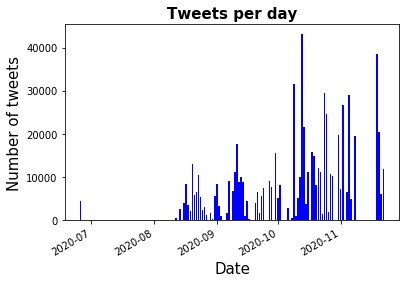

In [9]:
date_analysis = tweets.groupby(by="date_format").count()
date_analysis = date_analysis.reset_index()

x = date_analysis["date_format"]
y= date_analysis["text"] #whatever column (different of date_format) may work 
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets per day', fontsize=15, fontweight='bold')
plt.bar(x,y, color = "blue")
fig.autofmt_xdate()

# Users analysis

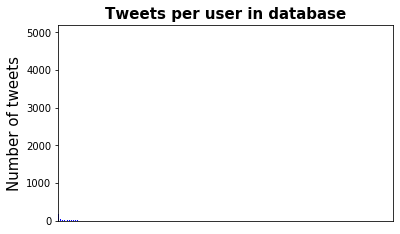

In [10]:
tweets_per_user = tweets['user_id'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.axes.xaxis.set_visible(False)
ax.set_xlabel('Users', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets per user in database', fontsize=15, fontweight='bold')
tweets_per_user.plot(ax=ax, kind='bar', color='blue')
fig.autofmt_xdate()

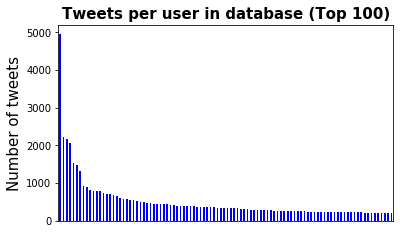

In [11]:
tweets_per_user = tweets['user_id'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.axes.xaxis.set_visible(False)
ax.set_xlabel('Users', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets per user in database (Top 100)', fontsize=15, fontweight='bold')
tweets_per_user[0:100].plot(ax=ax, kind='bar', color='blue')
fig.autofmt_xdate()

In [12]:
#Number of users in database
tweets['user_id'].nunique()

232528

In [13]:
#Change date creation of user account to an adequate format : similar process to the one with the date of publication
dates = []
for date in tweets["user_creation_date"]: #to keep only the date
    dates.append(date[:10])
tweets["new_date"] = dates

year = []
for date in tweets["user_creation_date"]: #to keep only the year
    year.append(date[26:])
tweets["year"] = year

date_format = []

equivalent_m = {"Jan" : 1, "Feb" : 2, "Mar" : 3, "Apr" : 4, "May" : 5, "Jun": 6, "Jul" : 7, "Aug" : 8, "Sep" : 9, "Oct": 10, "Nov": 11, "Dec": 12}

for index, row in tweets.iterrows() :
    day = int(row["new_date"][8:])
    month = int(equivalent_m[row["new_date"][4:7]])
    year = int(row["year"])
    date_format.append(datetime.date(year,month,day))
    
tweets["user_creation_date_format"] = date_format

tweets = tweets.drop(columns = ["new_date", "year"])
tweets.head()

,text,lang,country,date,user_name,user_id,nb_of_tweets,user_creation_date,verified,filter_level,favorite,retweet,url,hour,date_format,day,user_creation_date_format
0,JUST IN: US Treasury Office propose new rule t...,en,None,Sat Nov 21 17:30:27 +0000 2020,LiviN,1201027291,25459,Wed Feb 20 13:23:38 +0000 2013,0,low,0,0,0,17:30:27,2020-11-21,6,2013-02-20
1,The Bullish Case for #Bitcoin\n@real_vijay \n👉...,en,None,Sat Nov 21 17:30:28 +0000 2020,StormJib.HODL,15893397,3313,Mon Aug 18 16:31:04 +0000 2008,0,low,0,0,1,17:30:28,2020-11-21,6,2008-08-18
2,"BITCOIN MOONING STEP BY STEP UPWARD TO $26,000...",en,None,Sat Nov 21 17:30:28 +0000 2020,George Fish,109361772,39,Thu Jan 28 20:23:57 +0000 2010,0,low,0,0,1,17:30:28,2020-11-21,6,2010-01-28
3,RT @Thunderblunder7: pokemon showdown was made...,en,None,Sat Nov 21 17:30:28 +0000 2020,Brandon 🐝🌳🇬🇭🖤 #JoyconBoy,1027954637331202049,67326,Fri Aug 10 16:27:38 +0000 2018,0,low,0,0,0,17:30:28,2020-11-21,6,2018-08-10
4,"I recently discussed inflation/deflation, stim...",en,None,Sat Nov 21 17:30:28 +0000 2020,Altperspective,837994867028459521,364,Sat Mar 04 11:55:20 +0000 2017,0,low,0,0,0,17:30:28,2020-11-21,6,2017-03-04


In [14]:
#Calculate the average number of tweets per day for each user

tweets_per_day = []
for index, row in tweets.iterrows() :
    date_begin = row["user_creation_date_format"]
    date_end = row["date_format"]
    life_span = date_end-date_begin
    if life_span.days == 0 :
        tweets_per_day = tweets_per_day + [row["nb_of_tweets"]]
    else : 
        tweets_per_day = tweets_per_day + [row["nb_of_tweets"]/life_span.days]

tweets["tweets_per_day"] = tweets_per_day
tweets.head()

,text,lang,country,date,user_name,user_id,nb_of_tweets,user_creation_date,verified,filter_level,favorite,retweet,url,hour,date_format,day,user_creation_date_format,tweets_per_day
0,JUST IN: US Treasury Office propose new rule t...,en,None,Sat Nov 21 17:30:27 +0000 2020,LiviN,1201027291,25459,Wed Feb 20 13:23:38 +0000 2013,0,low,0,0,0,17:30:27,2020-11-21,6,2013-02-20,8.992935
1,The Bullish Case for #Bitcoin\n@real_vijay \n👉...,en,None,Sat Nov 21 17:30:28 +0000 2020,StormJib.HODL,15893397,3313,Mon Aug 18 16:31:04 +0000 2008,0,low,0,0,1,17:30:28,2020-11-21,6,2008-08-18,0.739839
2,"BITCOIN MOONING STEP BY STEP UPWARD TO $26,000...",en,None,Sat Nov 21 17:30:28 +0000 2020,George Fish,109361772,39,Thu Jan 28 20:23:57 +0000 2010,0,low,0,0,1,17:30:28,2020-11-21,6,2010-01-28,0.009873
3,RT @Thunderblunder7: pokemon showdown was made...,en,None,Sat Nov 21 17:30:28 +0000 2020,Brandon 🐝🌳🇬🇭🖤 #JoyconBoy,1027954637331202049,67326,Fri Aug 10 16:27:38 +0000 2018,0,low,0,0,0,17:30:28,2020-11-21,6,2018-08-10,80.726619
4,"I recently discussed inflation/deflation, stim...",en,None,Sat Nov 21 17:30:28 +0000 2020,Altperspective,837994867028459521,364,Sat Mar 04 11:55:20 +0000 2017,0,low,0,0,0,17:30:28,2020-11-21,6,2017-03-04,0.268041


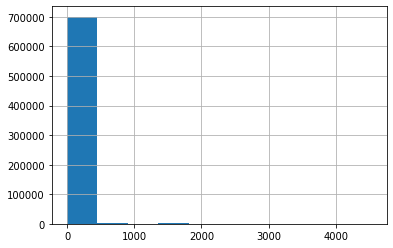

In [15]:
tweets["tweets_per_day"].hist()

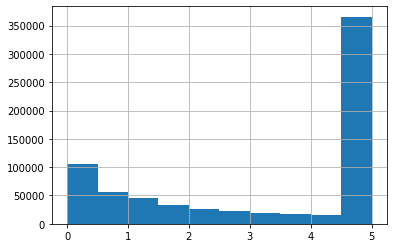

In [16]:
#Better vizualize the distribution
import numpy as np
tweets["cat_spammer"] = pd.cut(tweets["tweets_per_day"],
                               bins=[0.,0.5, 1, 1.5, 2, 2.5,3, 3.5, 4, 4.5, 5 ,np.inf],
                               labels=[0.,0.5, 1, 1.5, 2, 2.5,3, 3.5, 4, 4.5, 5])

tweets["cat_spammer"].hist()

In [17]:
tweets["tweets_per_day"].mean()

35.73706038054996

In [18]:
tweets["tweets_per_day"].median()

4.933852216451262

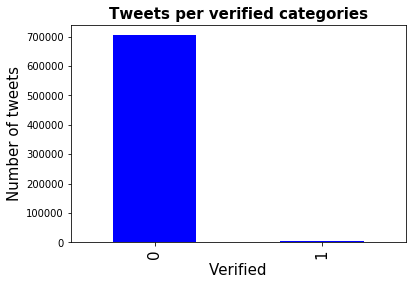

In [19]:
#Verified account

tweets_per_verified = tweets['verified'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Verified', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets per verified categories', fontsize=15, fontweight='bold')
tweets_per_verified.plot(ax=ax, kind='bar', color='blue')

# Filter level 

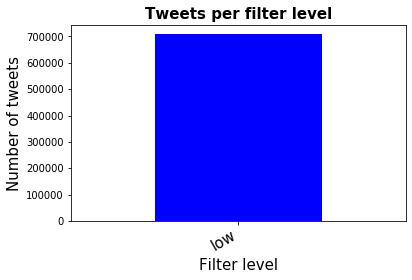

In [20]:
tweets_per_filter = tweets['filter_level'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Filter level', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets per filter level', fontsize=15, fontweight='bold')
tweets_per_filter.plot(ax=ax, kind='bar', color='blue')
fig.autofmt_xdate()

# URL

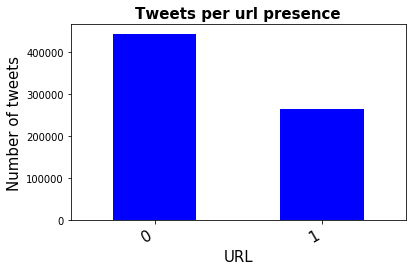

In [21]:
tweets_per_url = tweets['url'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('URL', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets per url presence', fontsize=15, fontweight='bold')
tweets_per_url.plot(ax=ax, kind='bar', color='blue')
fig.autofmt_xdate()

# Favorite analysis

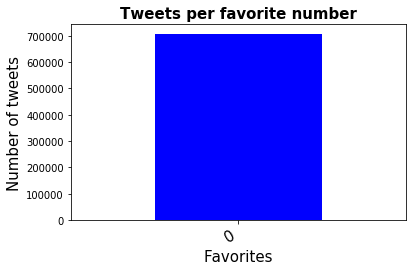

In [22]:
#Only 0 because the stream is in live, and there is no time for others users to react
tweets_per_favorite = tweets['favorite'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Favorites', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets per favorite number', fontsize=15, fontweight='bold')
tweets_per_favorite.plot(ax=ax, kind='bar', color='blue')
fig.autofmt_xdate()

# Retweet analysis

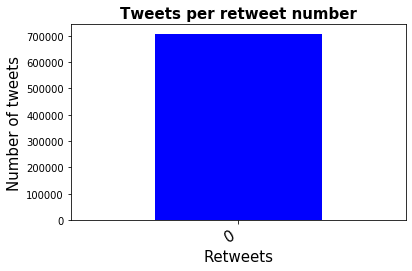

In [23]:
#Only 0 because the stream is in live, and there is no time for others users to react
tweets_per_retweet = tweets['retweet'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Retweets', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets per retweet number', fontsize=15, fontweight='bold')
tweets_per_retweet.plot(ax=ax, kind='bar', color='blue')
fig.autofmt_xdate()